In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
train=np.genfromtxt("ds3_train.csv",delimiter=',',skip_header=True)
valid=np.genfromtxt("ds3_valid.csv",delimiter=',',skip_header=True)
train

array([[ 0.        , -1.54831899, -2.76298744,  0.        ],
       [ 0.        , -3.95886967, -0.6127805 ,  0.        ],
       [ 0.        , -2.27637464,  0.61493359,  0.        ],
       ...,
       [ 1.        ,  1.10777214,  1.62589313,  0.        ],
       [ 1.        ,  1.46109326,  0.55889854,  0.        ],
       [ 1.        ,  0.93522112,  2.9003691 ,  0.        ]])

In [3]:
x_train=train[:,1:-1]
t_train=train[:,0].reshape(train.shape[0],1)

In [4]:
intercept=np.ones((x_train.shape[0],1))
x_train=np.append(intercept,x_train,axis=1)
x_train

array([[ 1.        , -1.54831899, -2.76298744],
       [ 1.        , -3.95886967, -0.6127805 ],
       [ 1.        , -2.27637464,  0.61493359],
       ...,
       [ 1.        ,  1.10777214,  1.62589313],
       [ 1.        ,  1.46109326,  0.55889854],
       [ 1.        ,  0.93522112,  2.9003691 ]])

In [5]:
def fit(x_train,y_train,lr=0.01,iterations=30):
        #Initializing variables
        theta=np.array([[1 for _ in range(x_train.shape[1])]]).T
        prev_log=float('-inf')
        for i in range(iterations):
            #Hypothesis
            z=np.dot(x_train,theta)
            hyp=1/(1+np.exp(-np.dot(x_train,theta)))
            #gradient of cost function
            dj=np.dot((hyp-y_train).T,x_train).T
            #parameters train , 'theta'
            theta=theta-lr*dj
            #Loglikelihood check , to exit loop
            loglikelihood=np.dot(y_train.T,np.log(hyp))+np.dot((1-y_train).T,np.log(1-hyp))
            if loglikelihood>prev_log:
                prev_log=loglikelihood
            else :
                break;
            #print('Loglikelihood -->',loglikelihood)
        return theta

### Training for values t

In [6]:
t_theta=fit(x_train,t_train)

In [7]:
t_theta

array([[-0.93615633],
       [ 2.69476757],
       [ 1.07107406]])

### Predictions of t (positive indications)

In [8]:
def predict_t(x_pred):
    return 1/(1+np.exp(-np.dot(x_pred,t_theta)))

### Training for Labels y

In [9]:
y_train=train[:,-1:]
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [10]:
y_theta=fit(x_train,y_train,0.001)
y_theta

array([[-2.47643701],
       [ 0.52123136],
       [ 0.11483984]])

In [11]:
def predict_y(x_pred):
    return 1/(1+np.exp(-np.dot(x_pred,y_theta)))

### Plotting x_train for insights

In [12]:
def split_plot_p(x,t):
    positive_x=x[t[:,0]>=0.5]
    negative_x=x[t[:,0]<=0.5]
    x1_p=positive_x[:,1]
    x2_p=positive_x[:,2]
    x1_n=negative_x[:,1]
    x2_n=negative_x[:,2]
    return x1_p,x2_p,x1_n,x2_n

In [13]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_train,t_train)

In [14]:
x1_line=[i for i in range(-6,6)]
at=t_theta[1][0]
bt=t_theta[2][0]

In [15]:
import seaborn as sns
sns.set()

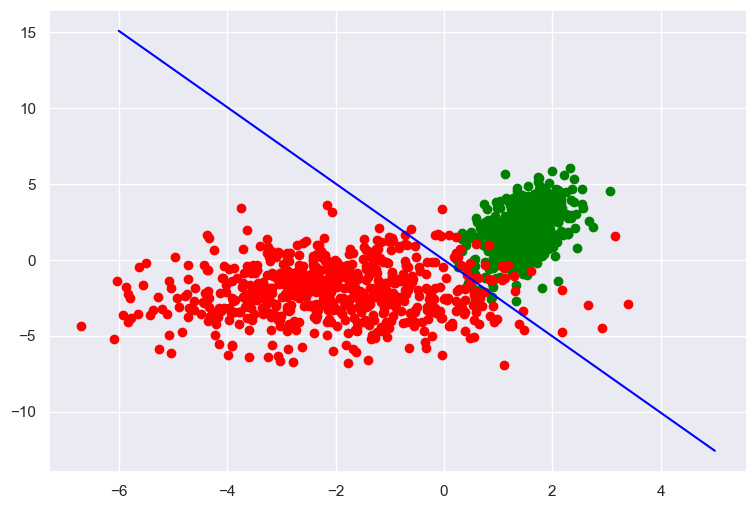

In [16]:
plt.figure(figsize=(9,6))
plt.scatter(x1_p,x2_p,color='green')
plt.scatter(x1_n,x2_n,color='red')
plt.plot(x1_line,[(-at/bt)*x for x in x1_line],color='blue')
plt.show()

### plotting y labels ''train''

In [17]:
ay=y_theta[1][0]
by=y_theta[2][0]

In [18]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_train,y_train)

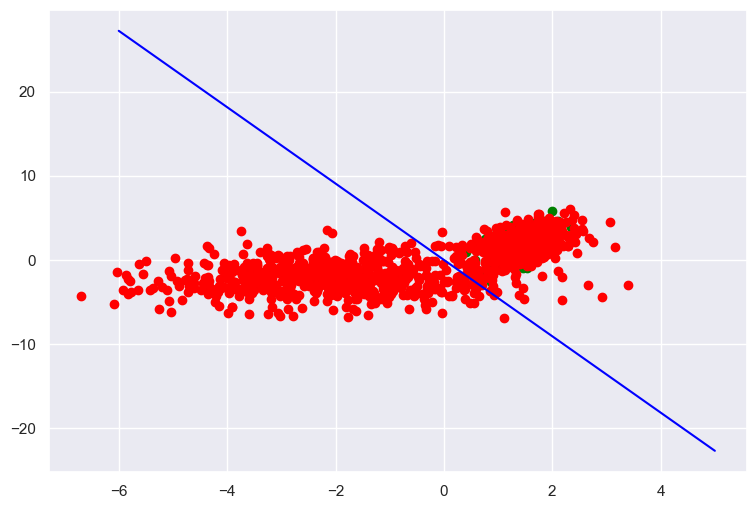

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(x1_p,x2_p,color='green')
plt.scatter(x1_n,x2_n,color='red')
plt.plot(x1_line,[(-ay/by)*x for x in x1_line],color='blue')
plt.show()

### Plotting classifier t over valid

In [20]:
x_valid=valid[:,1:-1]
intercept=np.ones((x_valid.shape[0],1))
x_valid=np.append(intercept,x_valid,axis=1)

In [21]:
x_valid.shape

(124, 3)

In [22]:
np.set_printoptions(suppress=True)

In [23]:
t_valid_prediction=predict_t(x_valid)

In [24]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_valid,t_valid_prediction)

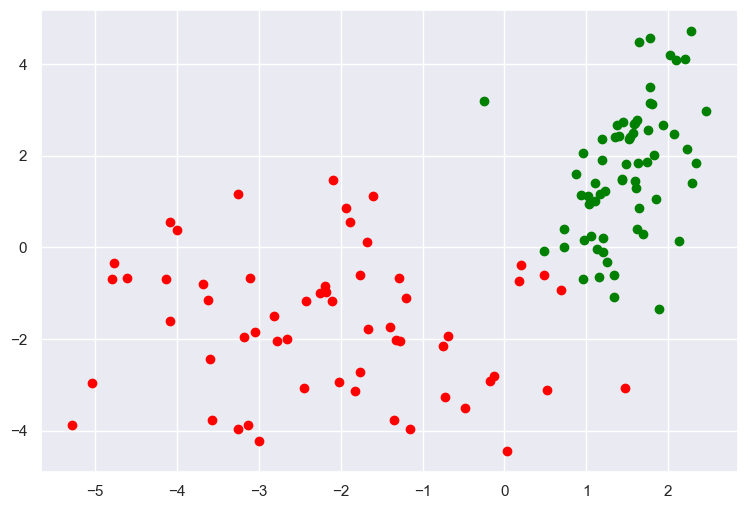

In [25]:
plt.figure(figsize=(9,6))
plt.scatter(x1_p,x2_p,color='green')
plt.scatter(x1_n,x2_n,color='red')
plt.show()

In [26]:
t_valid=valid[:,0].reshape(valid.shape[0],1)

In [27]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_valid,t_valid)

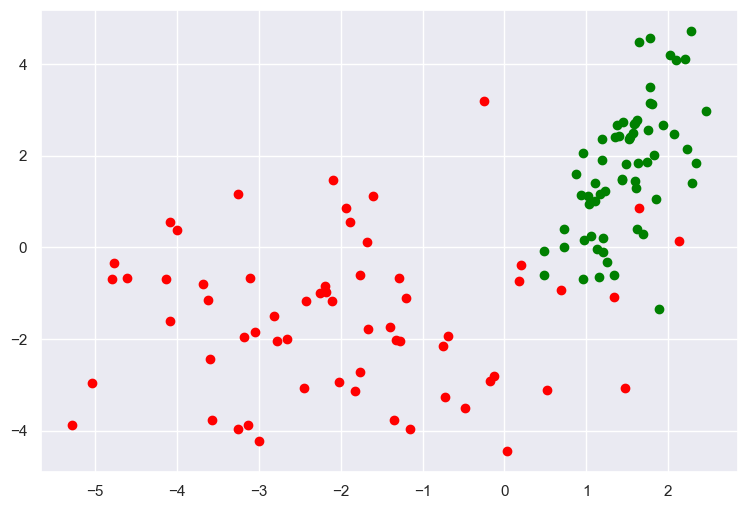

In [28]:
plt.figure(figsize=(9,6))
plt.scatter(x1_p,x2_p,color='green')
plt.scatter(x1_n,x2_n,color='red')
plt.show()

### e) estimating alfa using classifier t

In [29]:
y_valid=valid[:,-1:]

In [30]:
#classifier h over y=1
classifier_labeled=np.sum(t_valid_prediction[y_valid[:,0]==1])

In [31]:
alfa=(1/np.sum(y_valid))*classifier_labeled
alfa

0.9222660672481151

### Rescaling the classifier prediction of y's

In [32]:
def scaled_y_classifier(x_pred):
    return predict_y(x_pred)/alfa

### Using test-set with all 3 methods of predicting positive values:

In [33]:
test=np.genfromtxt('ds3_test.csv',delimiter=',',skip_header=True)

In [34]:
x_test=test[:,1:-1]
intercept=np.ones((x_test.shape[0],1))
x_test=np.append(intercept,x_test,axis=1)
x_test.shape

(124, 3)

In [35]:
test_pred1=predict_t(x_test)

In [36]:
test_pred2=predict_y(x_test)

In [37]:
test_pred3=scaled_y_classifier(x_test)

In [38]:
test_actual=test[:,0].reshape(test.shape[0],1)

C:\Users\mmopa\AppData\Local\Temp\ipykernel_2852\1923593673.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


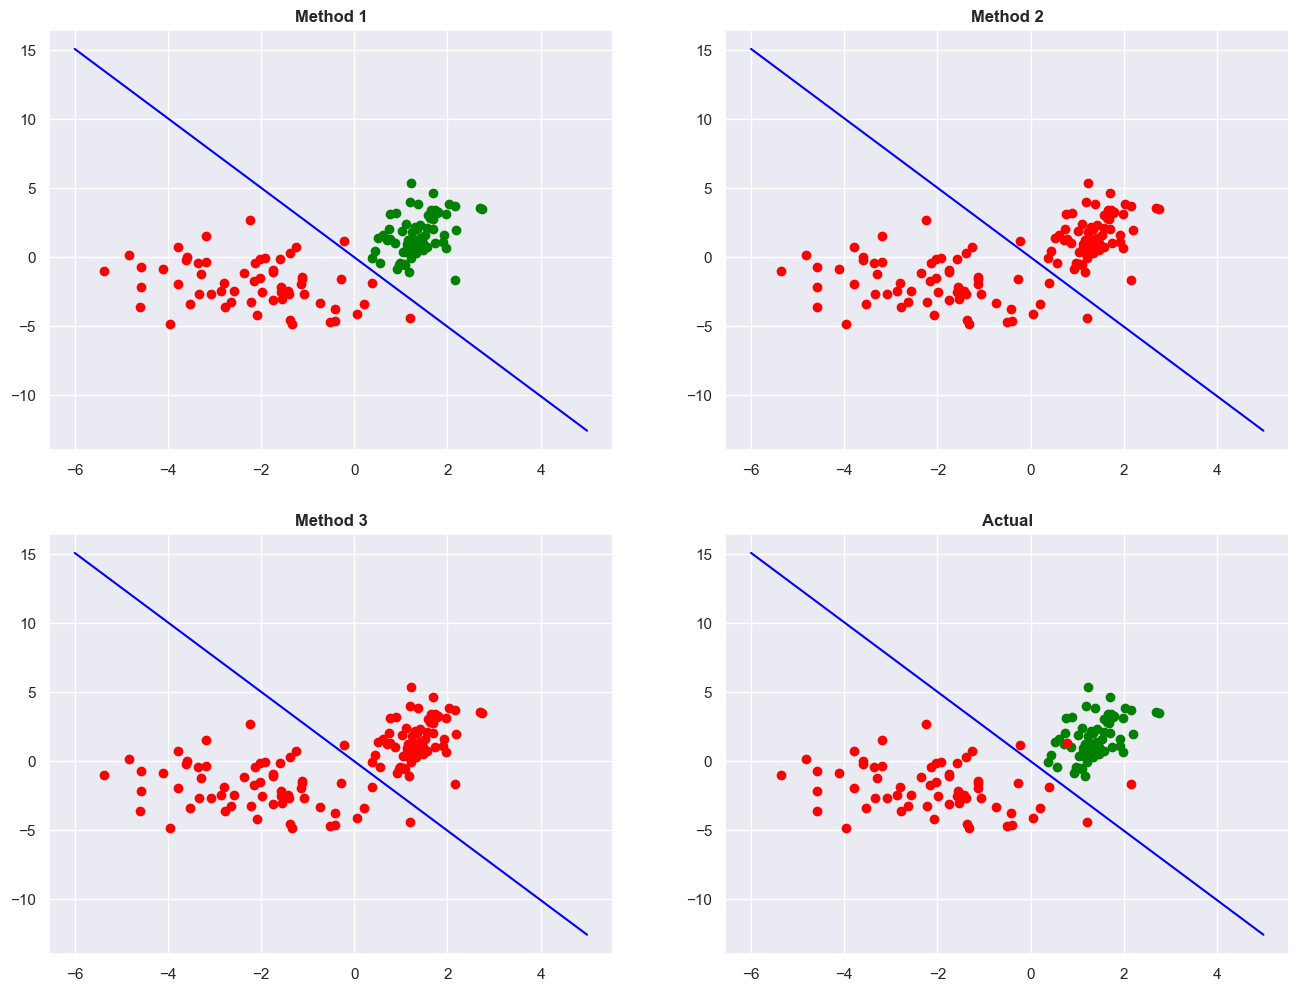

In [45]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_test,test_pred1)
fig,axis=plt.subplots(2,2,figsize=(16,12))
axis[0,0].scatter(x1_p,x2_p,color='green')
axis[0,0].scatter(x1_n,x2_n,color='red')
axis[0,0].set_title('Method 1',weight='bold')
axis[0,0].plot(x1_line,[(-at/bt)*x for x in x1_line],color='blue')
#-------------------------------------------
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_test,test_pred2)
axis[0,1].scatter(x1_p,x2_p,color='green')
axis[0,1].scatter(x1_n,x2_n,color='red')
axis[0,1].set_title('Method 2',weight='bold')
axis[0,1].plot(x1_line,[(-at/bt)*x for x in x1_line],color='blue')
#-------------------------------------------
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_test,test_pred3)
axis[1,0].scatter(x1_p,x2_p,color='green')
axis[1,0].scatter(x1_n,x2_n,color='red')
axis[1,0].set_title('Method 3',weight='bold')
axis[1,0].plot(x1_line,[(-at/bt)*x for x in x1_line],color='blue')
#-------------------------------------------
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_test,test_actual)
axis[1,1].scatter(x1_p,x2_p,color='green')
axis[1,1].scatter(x1_n,x2_n,color='red')
axis[1,1].set_title('Actual',weight='bold')
axis[1,1].plot(x1_line,[(-at/bt)*x for x in x1_line],color='blue')
fig.show()

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic_model = LogisticRegression().fit(x_train,y_train)

C:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
y_pred=logistic_model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [43]:
x1_p,x2_p,x1_n,x2_n=split_plot_p(x_train,y_train)

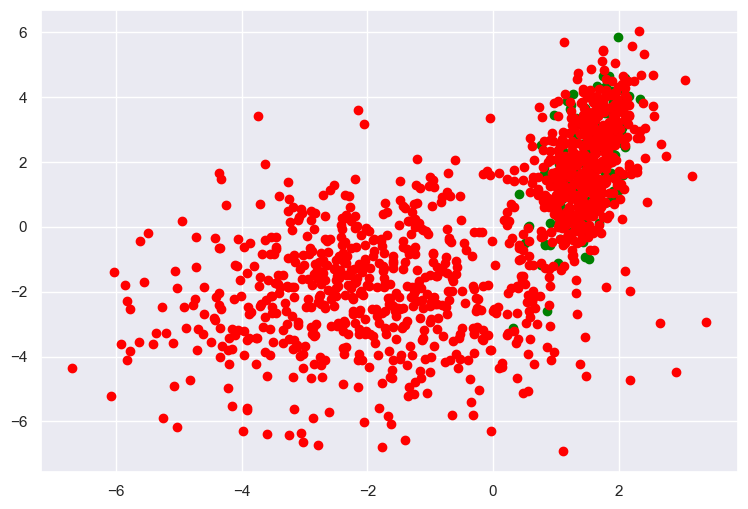

In [44]:
plt.figure(figsize=(9,6))
plt.scatter(x1_p,x2_p,color='green')
plt.scatter(x1_n,x2_n,color='red')
plt.show()